In [72]:
import numpy as np
import pandas as pd

In [106]:
#Loading the data
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header=None)
df.columns = ['sl','sw','pl','pw','flower_type']
print(df.head())

    sl   sw   pl   pw  flower_type
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa


In [115]:
df_x=df.iloc[:,:4]
df_y=df.iloc[:,4]
print(df_x.head())
print(df_y.head())

    sl   sw   pl   pw
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2
0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: flower_type, dtype: object


In [116]:
print(df_x.describe())
df_y.describe()

               sl          sw          pl          pw
count  150.000000  150.000000  150.000000  150.000000
mean     5.843333    3.054000    3.758667    1.198667
std      0.828066    0.433594    1.764420    0.763161
min      4.300000    2.000000    1.000000    0.100000
25%      5.100000    2.800000    1.600000    0.300000
50%      5.800000    3.000000    4.350000    1.300000
75%      6.400000    3.300000    5.100000    1.800000
max      7.900000    4.400000    6.900000    2.500000


count             150
unique              3
top       Iris-setosa
freq               50
Name: flower_type, dtype: object

In [117]:
from sklearn import model_selection
X_train,X_test,Y_train,Y_test=model_selection.train_test_split(df_x,df_y)
print(X_train.shape)
print(X_test.shape)

(112, 4)
(38, 4)


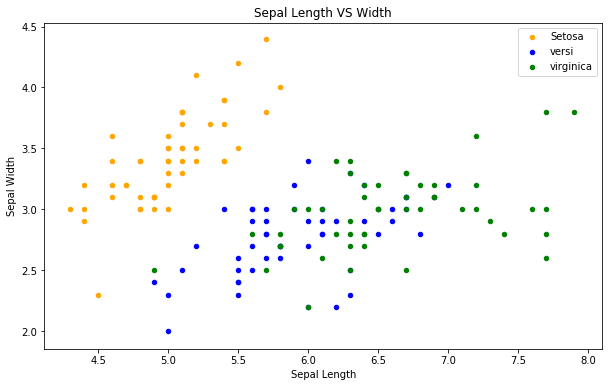

In [122]:
import seaborn as sb
import matplotlib.pyplot as plt
#Correlation between sepal length and sepal width.
fig=df[df.flower_type=='Iris-setosa'].plot(kind='scatter',x='sl',y='sw',color='orange', label='Setosa')
df[df.flower_type=='Iris-versicolor'].plot(kind='scatter',x='sl',y='sw',color='blue', label='versi',ax=fig)
df[df.flower_type=='Iris-virginica'].plot(kind='scatter',x='sl',y='sw',color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

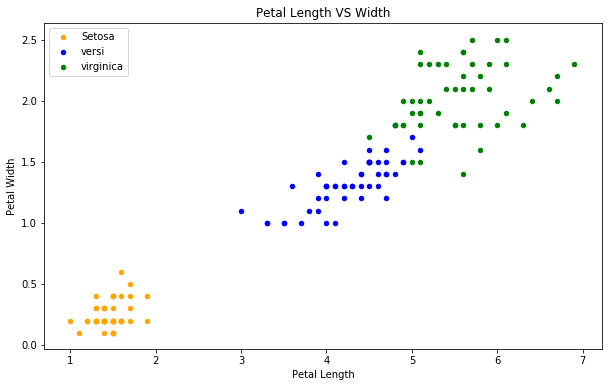

In [167]:
#Correlation between petal length and petal width
fig=df[df.flower_type=='Iris-setosa'].plot(kind='scatter',x='pl',y='pw',color='orange', label='Setosa')
df[df.flower_type=='Iris-versicolor'].plot(kind='scatter',x='pl',y='pw',color='blue', label='versi',ax=fig)
df[df.flower_type=='Iris-virginica'].plot(kind='scatter',x='pl',y='pw',color='green', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title("Petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()
#Here, we get that petals have a good correlation between them.

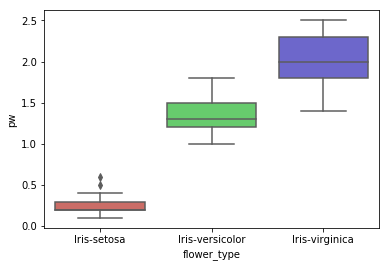

In [175]:
sb.boxplot(x='flower_type', y='pw', data=df, palette='hls')
#So,this boxplot is not good for continuous values.

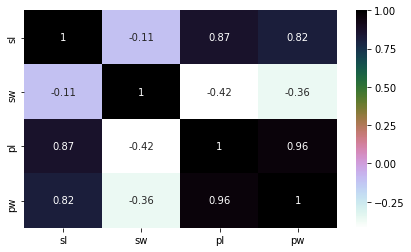

In [127]:
plt.figure(figsize=(7,4)) 
sb.heatmap(df.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()
#From the matrix we find the correlation matrix that sepal length and width are less correlated than petal length and width(highly correlated).

In [131]:
#Importing scveral algorithms for predicting output.
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [141]:
#Select the algorithm
model=svm.SVC()
model.fit(X_train,Y_train)
pred=model.predict(X_test)
print("Score for SVM is",metrics.accuracy_score(pred,Y_test))

Score for SVM is 0.9736842105263158


In [142]:
model=LogisticRegression()
model.fit(X_train,Y_train)
pred=model.predict(X_test)
print("Score for Logistic Regression is",metrics.accuracy_score(pred,Y_test))

Score for Logistic Regression is 0.9473684210526315


In [161]:
#Now, separating data beteen sepals and petals.
sepal=df[['sl','sw','flower_type']]
sepal_x=sepal[['sl','sw']]
sepal_y=sepal[['flower_type']]
petal=df[['pl','pw','flower_type']]
petal_x=petal[['pl','pw']]
petal_y=petal[['flower_type']]
sepal_train_x,sepal_test_x,sepal_train_y,sepal_test_y=model_selection.train_test_split(sepal_x,sepal_y)
model=LogisticRegression()
model.fit(sepal_train_x,sepal_train_y)
pred=model.predict(sepal_test_x)
print("Score for Sepals is",metrics.accuracy_score(pred,sepal_test_y))

Score for Sepals is 0.631578947368421


C:\Users\intel\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [164]:
petal=df[['pl','pw','flower_type']]
petal_x=petal[['pl','pw']]
petal_y=petal[['flower_type']]
petal_train_x,petal_test_x,petal_train_y,petal_test_y=model_selection.train_test_split(petal_x,petal_y)
model=LogisticRegression()
model.fit(petal_train_x,petal_train_y)
pred=model.predict(petal_test_x)
print("Score for Petals is",metrics.accuracy_score(pred,petal_test_y))
#So from here we can conclude that taking petals for prediction yields better score.

Score for Petals is 0.7894736842105263


C:\Users\intel\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [166]:
#OBSERVATIONS:-
#Using Petals over Sepal for training the data gives a much better accuracy.
#This was expected as we saw in the heatmap above that the correlation 
#between the Sepal Width and Length was very low whereas the correlation between Petal Width and Length was very high.